<a href="https://colab.research.google.com/github/takyaC/Finance/blob/main/PriceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yahoo_fin

In [2]:
pip install requests_html

     |████████████████████████████████| 92kB 4.4MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
  Created wheel for parse: filename=parse-1.19.0-cp36-none-any.whl size=24582 sha256=467bece4b8580c79a05f73151919924e50b0c44370e6605bb38a16a393e8d5c3
  Stored in directory: /root/.cache/pip/wheels/c0/39/ea/e2fd678bd130953f5438470b8dfa529f00787e9b8b92b27467
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=f9d37d623f0405d6be4cfffed3ca62d9e2065fefe664b6f70b400816109ba06c
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built parse fake-useragent
ERROR: pyppeteer 0.2.5 has requirement urllib3<2.0.0,>=1.25.8, but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: im

In [47]:
from yahoo_fin.stock_info import get_data
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [37]:
tickers = ["MRNA", "EBS", "BNTX"]

In [81]:
price_data_of_ticker = []
for ticker in tickers:
    try:
      # 株価データ
      price_data = get_data(ticker, "01/01/2019", "01/01/2021", True, "1d") # 1wk
      price_data_of_ticker.append(price_data)
      
    except BaseException as be:
      print("error", be)

              adjclose
2019-01-02   15.330000
2019-01-03   15.500000
2019-01-04   16.959999
2019-01-07   16.270000
2019-01-08   16.950001
...                ...
2020-12-24  123.389999
2020-12-28  111.400002
2020-12-29  114.389999
2020-12-30  111.129997
2020-12-31  104.470001

[505 rows x 1 columns]
             adjclose
2019-01-02  57.700001
2019-01-03  57.540001
2019-01-04  58.790001
2019-01-07  61.549999
2019-01-08  62.700001
...               ...
2020-12-24  93.839996
2020-12-28  92.160004
2020-12-29  90.139999
2020-12-30  92.699997
2020-12-31  89.599998

[505 rows x 1 columns]
             adjclose
2019-10-10  14.240000
2019-10-11  13.820000
2019-10-14  12.750000
2019-10-15  12.920000
2019-10-16  12.940000
...               ...
2020-12-24  96.959999
2020-12-28  88.110001
2020-12-29  88.279999
2020-12-30  83.940002
2020-12-31  81.519997

[310 rows x 1 columns]


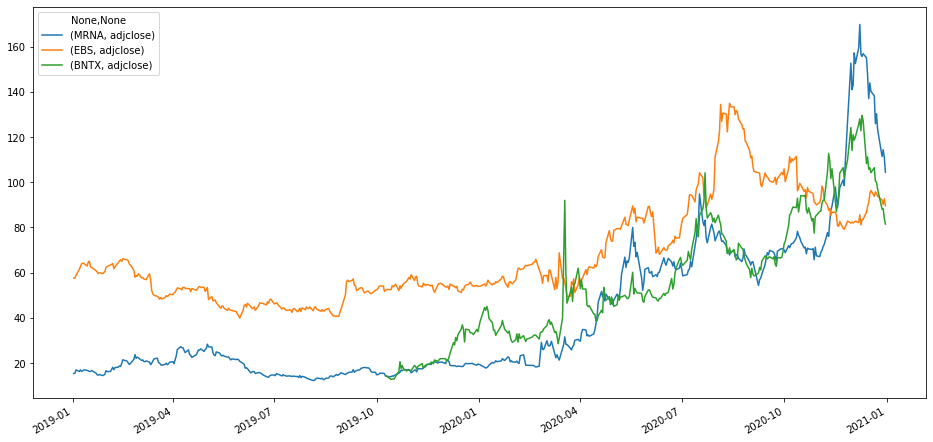

In [82]:
data_of_ticker = []

index = 0
for ticker in tickers:
    try:
      # 設定
      data = price_data_of_ticker[index].loc[: , ["adjclose"]]
      print(data)
      data_of_ticker.append(data)
      
    except BaseException as be:
      print("error", be)
    
    finally:
      index+=1

dfs = pandas.concat(data_of_ticker, axis=1, keys=tickers)
dfs.loc[:, tickers].interpolate(method='linear').plot(figsize=(16,8))

              adjclose
2019-01-02   15.330000
2019-01-03   15.500000
2019-01-04   16.959999
2019-01-07   16.270000
2019-01-08   16.950001
...                ...
2020-12-24  123.389999
2020-12-28  111.400002
2020-12-29  114.389999
2020-12-30  111.129997
2020-12-31  104.470001

[505 rows x 1 columns]
             adjclose
2019-01-02  57.700001
2019-01-03  57.540001
2019-01-04  58.790001
2019-01-07  61.549999
2019-01-08  62.700001
...               ...
2020-12-24  93.839996
2020-12-28  92.160004
2020-12-29  90.139999
2020-12-30  92.699997
2020-12-31  89.599998

[505 rows x 1 columns]
             adjclose
2019-10-10  14.240000
2019-10-11  13.820000
2019-10-14  12.750000
2019-10-15  12.920000
2019-10-16  12.940000
...               ...
2020-12-24  96.959999
2020-12-28  88.110001
2020-12-29  88.279999
2020-12-30  83.940002
2020-12-31  81.519997

[310 rows x 1 columns]


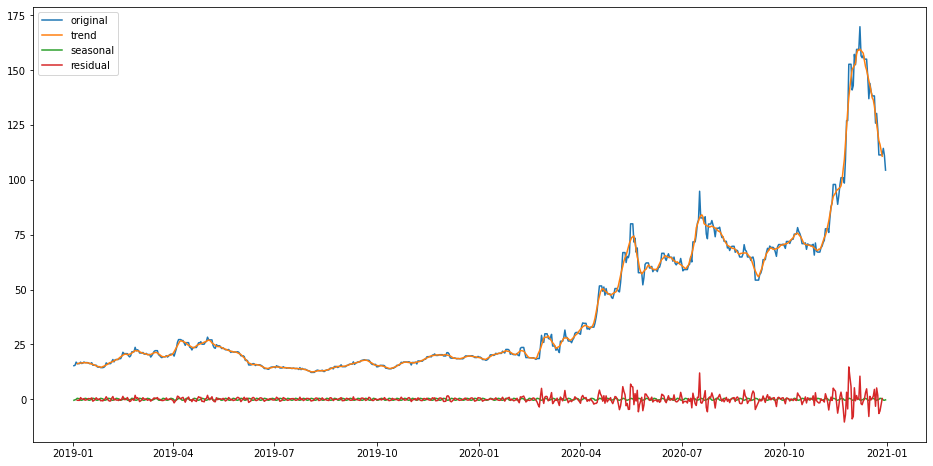

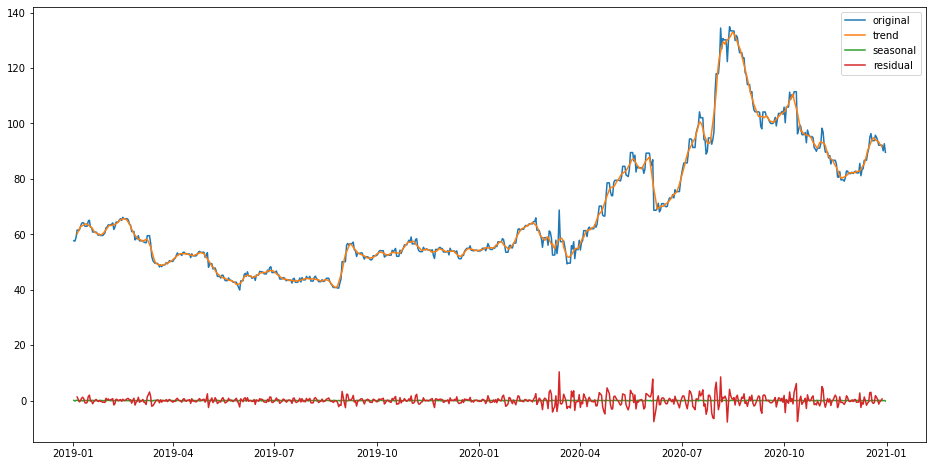

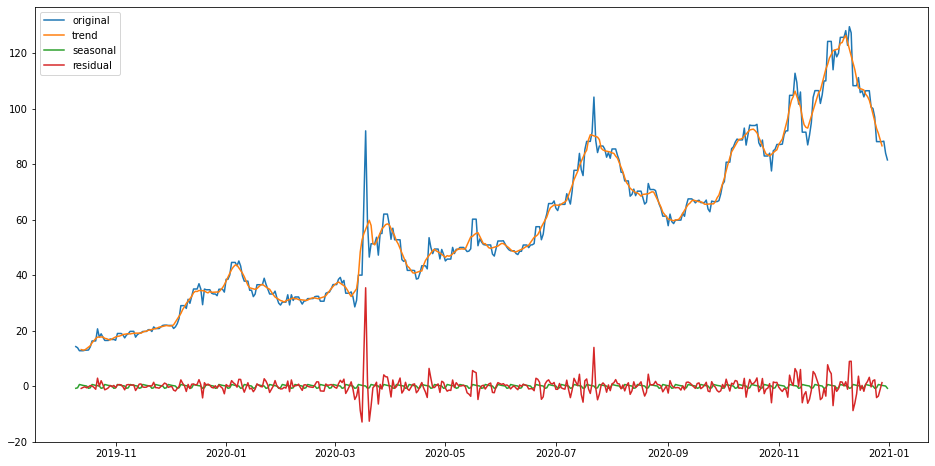

In [103]:
index = 0
for ticker in tickers:
    try:
       data = price_data_of_ticker[index].loc[: , ["adjclose"]]
       print(data)
       
       # 日単位
       data = data.asfreq(freq='D', method='bfill')
       # print(data)

       # 週単位  
       # https://note.nkmk.me/python-pandas-time-series-resample-asfreq/
      #  data = data.resample('W').first()

       res = sm.tsa.seasonal_decompose(data)
       original = data
       trend = res.trend
       seasonal = res.seasonal
       residual = res.resid

       plt.figure(figsize=(16, 8)) 
       plt.plot(original, label="original")
       plt.plot(trend, label="trend")
       plt.plot(seasonal, label="seasonal")
       plt.plot(residual, label="residual")
       plt.legend()
      
    except BaseException as be:
      print("error", be)
    
    finally:
      index+=1
